<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

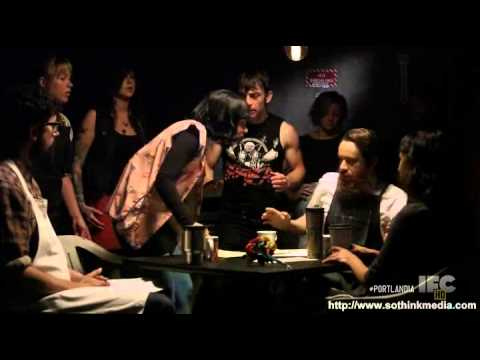

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/home/ivancampos/Documents/GitHub/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# Start here 
shops.star_rating.unique()

array([' 5.0 star rating ', ' 4.0 star rating ', ' 2.0 star rating ',
       ' 3.0 star rating ', ' 1.0 star rating '], dtype=object)

In [5]:
shops['star_rating'] = shops['star_rating'].str.replace(' star rating', '')

In [6]:
shops['star_rating']

0        5.0 
1        4.0 
2        4.0 
3        2.0 
4        4.0 
        ...  
7611     4.0 
7612     5.0 
7613     4.0 
7614     3.0 
7615     4.0 
Name: star_rating, Length: 7616, dtype: object

In [7]:
shops['star_rating'] = shops['star_rating'].astype(float)

In [8]:
num = 0
for row in shops['full_review_text']:
    shops['full_review_text'][num] = shops['full_review_text'][num].lstrip(' ')
    shops['full_review_text'][num] = shops['full_review_text'][num][10:]
    shops['full_review_text'][num] = shops['full_review_text'][num].lstrip(' ')
    num = num + 1


In [9]:
shops['full_review_text']

0       1 check-in Love love loved the atmosphere! Eve...
1       Listed in Date Night: Austin, Ambiance in Aust...
2       1 check-in Listed in Brunch Spots I loved the ...
3       Very cool decor! Good drinks Nice seating  How...
4       1 check-in They are located within the Northcr...
                              ...                        
7611    I actually step into this restaurant by chance...
7612    Ok, The Steeping Room IS awesome. How do they ...
7613    Loved coming here for tea, and the atmosphere ...
7614    he food is just average. The booths didn't fee...
7615    I finally stopped in for lunch with my colleag...
Name: full_review_text, Length: 7616, dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [10]:
from collections import Counter
import re
import pandas as pd
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [12]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [13]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [39]:
shops['tokens']

0       [1, check, -, love, love, loved, atmosphere, !...
1       [listed, date, night, :, austin, ,, ambiance, ...
2       [1, check, -, listed, brunch, spots, loved, ec...
3       [cool, decor, !, good, drinks, nice, seating, ...
4       [1, check, -, located, northcross, mall, shopp...
                              ...                        
7611    [actually, step, restaurant, chance, favorites...
7612    [ok, ,, steeping, room, awesome, ., great, men...
7613    [loved, coming, tea, ,, atmosphere, pretty, fr...
7614    [average, ., booths, feel, clean, ., waitstaff...
7615    [finally, stopped, lunch, colleague, glad, ., ...
Name: tokens, Length: 7616, dtype: object

In [15]:
shops[['full_review_text', 'tokens']][:10]

,full_review_text,tokens
0,1 check-in Love love loved the atmosphere! Eve...,"[1, checkin, love, love, loved, the, atmospher..."
1,"Listed in Date Night: Austin, Ambiance in Aust...","[listed, in, date, night, austin, ambiance, in..."
2,1 check-in Listed in Brunch Spots I loved the ...,"[1, checkin, listed, in, brunch, spots, i, lov..."
3,Very cool decor! Good drinks Nice seating How...,"[very, cool, decor, good, drinks, nice, seatin..."
4,1 check-in They are located within the Northcr...,"[1, checkin, they, are, located, within, the, ..."
5,1 check-in Very cute cafe! I think from the mo...,"[1, checkin, very, cute, cafe, i, think, from,..."
6,"2 check-ins Listed in ""Nuptial Coffee Bliss!"",...","[2, checkins, listed, in, nuptial, coffee, bli..."
7,2 check-ins Love this place! 5 stars for clea...,"[2, checkins, love, this, place, 5, stars, for..."
8,"1 check-in Ok, let's try this approach... Pro...","[1, checkin, ok, lets, try, this, approach, pr..."
9,3 check-ins This place has been shown on my so...,"[3, checkins, this, place, has, been, shown, o..."


In [16]:
word_counts = Counter()

In [17]:
shops['tokens'].apply(lambda x: word_counts.update(x))

0       None
1       None
2       None
3       None
4       None
        ... 
7611    None
7612    None
7613    None
7614    None
7615    None
Name: tokens, Length: 7616, dtype: object

In [18]:
word_counts.most_common(10)

[('the', 34754),
 ('and', 26650),
 ('a', 22746),
 ('i', 20097),
 ('to', 17163),
 ('of', 12600),
 ('is', 12000),
 ('coffee', 10344),
 ('was', 9705),
 ('in', 9542)]

In [19]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [20]:
wc = count(shops['tokens'])

In [21]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
31,the,6844,34754,1.0,0.044947,0.044947,0.898634
64,and,6864,26650,2.0,0.034466,0.079413,0.901261
60,a,6244,22746,3.0,0.029417,0.108830,0.819853
6,i,5505,20097,4.0,0.025991,0.134821,0.722820
69,to,5653,17163,5.0,0.022197,0.157017,0.742253


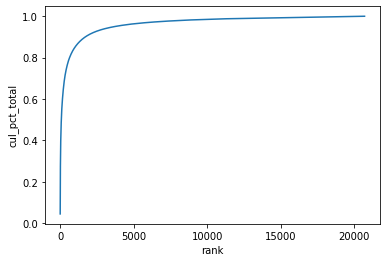

In [22]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [23]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.5379429326704835

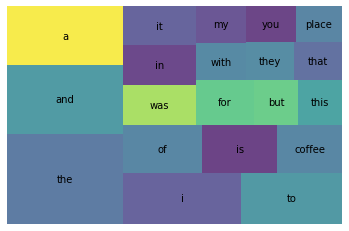

In [24]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [25]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in nlp.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [41]:
shops['tokens']

0       [1, check, -, love, love, loved, atmosphere, !...
1       [listed, date, night, :, austin, ,, ambiance, ...
2       [1, check, -, listed, brunch, spots, loved, ec...
3       [cool, decor, !, good, drinks, nice, seating, ...
4       [1, check, -, located, northcross, mall, shopp...
                              ...                        
7611    [actually, step, restaurant, chance, favorites...
7612    [ok, ,, steeping, room, awesome, ., great, men...
7613    [loved, coming, tea, ,, atmosphere, pretty, fr...
7614    [average, ., booths, feel, clean, ., waitstaff...
7615    [finally, stopped, lunch, colleague, glad, ., ...
Name: tokens, Length: 7616, dtype: object

In [69]:
STOP_WORDS = nlp.Defaults.stop_words.union(['l','I', 'i', 'it', "it's", 'it.', 'the', 'this', 'food', ',', '.', '!', '-', ' ', ')','(', '1', 'coffee', 'place',])

In [63]:
tokens = []

for doc in nlp.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [64]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
28,coffee,4905,10530,1.0,0.028247,0.028247,0.644039
109,place,3664,5443,2.0,0.014601,0.042848,0.481092
159,good,2782,3971,3.0,0.010652,0.053500,0.365284
148,great,2814,3889,4.0,0.010432,0.063932,0.369485
39,check,3129,3357,5.0,0.009005,0.072937,0.410846


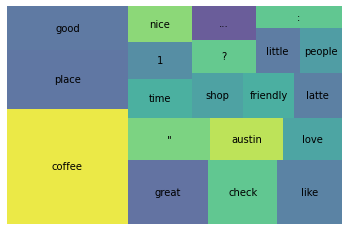

In [65]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [70]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON') and (token.text.lower() not in STOP_WORDS):
            lemmas.append(token.lemma_)
    
    return lemmas

In [71]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

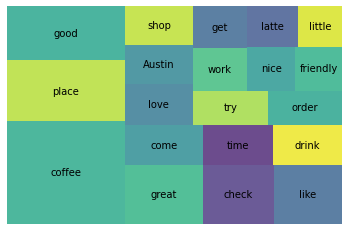

In [73]:
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [74]:
shops_good = shops[shops['star_rating'] >= 4].copy()
shops_bad = shops[shops['star_rating'] <= 3].copy()

In [75]:
shops_good.head()

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0,"[1, check, love, love, loved, atmosphere, corn...","[check, Love, love, love, atmosphere, corner, ..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,"[listed, date, night, :, austin, ambiance, aus...","[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0,"[1, check, listed, brunch, spots, loved, eclec...","[check, list, Brunch, Spots, love, eclectic, h..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,"[1, check, located, northcross, mall, shopping...","[check, locate, Northcross, mall, shopping, ce..."
5,The Factory - Cafe With a Soul,1 check-in Very cute cafe! I think from the mo...,4.0,"[1, check, cute, cafe, think, moment, stepped,...","[check, cute, cafe, think, moment, step, find,..."


In [76]:
shops_bad.head()

,coffee_shop_name,full_review_text,star_rating,tokens,lemmas
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0,"[cool, decor, good, drinks, nice, seating, ......","[cool, decor, good, drink, nice, seating, over..."
8,The Factory - Cafe With a Soul,"1 check-in Ok, let's try this approach... Pro...",3.0,"[1, check, ok, let, try, approach, ..., pros, ...","[check, ok, let, try, approach, pro, music, Se..."
11,The Factory - Cafe With a Soul,"The store has A+ decoration, but honestly, the...",3.0,"[store, a+, decoration, honestly, coffee, good...","[store, a+, decoration, honestly, coffee, good..."
12,The Factory - Cafe With a Soul,1 check-in Listed in 2016 - The Third Time is ...,3.0,"[1, check, listed, 2016, time, charm, factory,...","[check, list, 2016, time, Charm, Factory, a+, ..."
25,The Factory - Cafe With a Soul,"Okay, so after visiting my friends in LA and t...",1.0,"[okay, visiting, friends, la, trying, mint, mo...","[okay, visit, friend, LA, try, mint, mojito, i..."


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


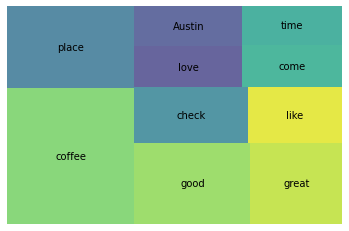

In [77]:
wc = count(shops_good['lemmas'])
wc_top20_good = wc[wc['rank'] <= 10]

squarify.plot(sizes=wc_top20_good['pct_total'], label=wc_top20_good['word'], alpha=.8 )
plt.axis('off')
plt.show()

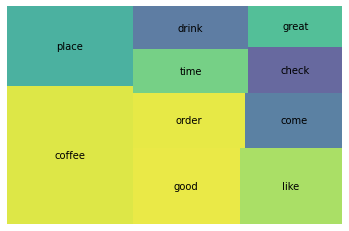

In [78]:
wc = count(shops_bad['lemmas'])
wc_top20_bad = wc[wc['rank'] <= 10]

squarify.plot(sizes=wc_top20_bad['pct_total'], label=wc_top20_bad['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

